In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

## Data

data example:
[[-0.34348594 -0.55805145  0.        ]
 [-0.51484832 -0.41608057  0.        ]
 [-0.56767092 -0.5192265   0.        ]
 [ 0.66276557  0.49362349  1.        ]]


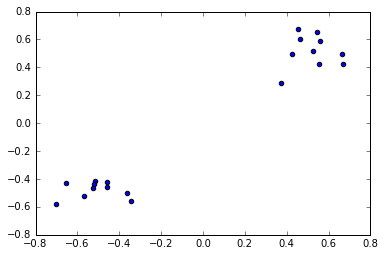

In [86]:
# Lets have some (linearly separated blobs) data to start with 
def get_datapoints(n):
    import numpy as np
    from sklearn.datasets.samples_generator import make_blobs
    X, labels = make_blobs(n_samples=n, centers=[[-0.5, -0.5], [0.5, 0.5]], cluster_std=0.1)
    # add X and labels
    return np.append(X, labels.reshape(len(labels), 1), axis=1)

data = get_datapoints(20)
print "data example:\n", data[:4]
# plot them
_ = plt.scatter(data[:,0], data[:,1])

# The perceptron as class

In [325]:
from pylab import rand,plot,show,norm

class Perceptron:
    
    def __init__(self, verbose=True):
        """ perceptron initialization """
        self.w = rand(2) * 2 - 1
        self.w_vec = [] # we keep also the evolution of the weights

        # The learning rate we choose
        self.learning_rate = 0.01
    
        # print training info if verbose 
        self.verbose = verbose
    
    def response(self,x):
        """ perceptron output """
        # dot product between w and x
        y = x[0] * self.w[0] + x[1] * self.w[1] 
        return 1 if y >= 0. else 0

    
    def train(self, data, n_epochs=100):
        """ 
        trains all the vector in data.
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        learned = False
        for epoch in range(n_epochs):
            
            sum_error = 0.0
            for datapoint in data: 

                expected = datapoint[2]
                predicted = self.response(datapoint)    
                
                # if we have a wrong response
                #print self.w, expected, predicted


                if expected != predicted: 

                    
                    # update sum error
                    sum_error += abs(expected - predicted)

                    # update weights
                    # w(t+1) = w(t) + learning_rate * (expected - predicted) * x
                    self.w[0] += self.learning_rate * (expected - predicted) * datapoint[0]
                    self.w[1] += self.learning_rate * (expected - predicted) * datapoint[1]

                    # keep history
                    self.w_vec.append(self.w)

            print "epoch:{0}, sum error: {1}, learned: {2}, weights: {3}"\
                    .format(epoch, sum_error, (sum_error == 0), self.w)
            if sum_error == 0.:
                print self.w

                break



# Train Perceptron

In [322]:
data_train = get_datapoints(1000)
perceptron = Perceptron()   
perceptron.train(data_train)  

epoch:0, sum error: 62.0, learned: False
epoch:1, sum error: 2.0, learned: False
epoch:2, sum error: 1.0, learned: False
epoch:3, sum error: 1.0, learned: False
epoch:4, sum error: 1.0, learned: False
epoch:5, sum error: 1.0, learned: False
epoch:6, sum error: 0.0, learned: True
[-0.06410504  0.26924204]


# Use (trained) Perceptron for classification

error


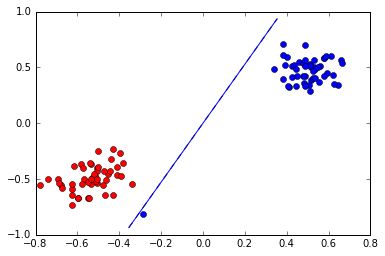

In [329]:
testset = get_datapoints(100)  # test set generation
# Perceptron test
for x in testset:
    r = perceptron.response(x)
    if r != x[2]: # if the response is not correct
        print 'error'
    if r == 1:
        plot(x[0],x[1],'ob')  
    else:
        plot(x[0],x[1],'or')


# plot of the separation line.
# The separation line is orthogonal to w
n = norm(perceptron.w)
ww = perceptron.w/n
ww1 = [ww[1], -ww[0]]
ww2 = [-ww[1], ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k')

# plot now the initial separation line
w_i = perceptron.w_vec[0]
ww_i = w_i/norm(w_i)
ww1_i = [ww_i[1], -ww_i[0]]
ww2_i = [-ww_i[1], ww_i[0]]
plot([ww1_i[0], ww2_i[0]],[ww1_i[1], ww2_i[1]],'-b')

show()

# Understand Initialization Step

In [326]:
# generate data
data = get_datapoints(200)
train_data = data[:100]
test_data = data[100:]

# train with perceptron
perceptron = Perceptron(verbose=True)   
perceptron.train(data_train)  


epoch:0, sum error: 45.0, learned: False, weights: [ 0.47063333 -0.20533736]
epoch:1, sum error: 3.0, learned: False, weights: [ 0.47782744 -0.18741038]
epoch:2, sum error: 1.0, learned: False, weights: [ 0.47999638 -0.18181547]
epoch:3, sum error: 0.0, learned: True, weights: [ 0.47999638 -0.18181547]
[ 0.47999638 -0.18181547]


In [327]:
perceptron.w_vec

[array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.18181547]),
 array([ 0.47999638, -0.1818

In [ ]:
# Perceptron test
for x in test_data:
    r = perceptron.response(x)
    if r != x[2]: # if the response is not correct
        print 'error'
    if r == 1:
        plot(x[0],x[1],'ob')  
    else:
        plot(x[0],x[1],'or')



plot([ww1_i[0], ww2_i[0]],[ww1_i[1], ww2_i[1]],'-b')

show()